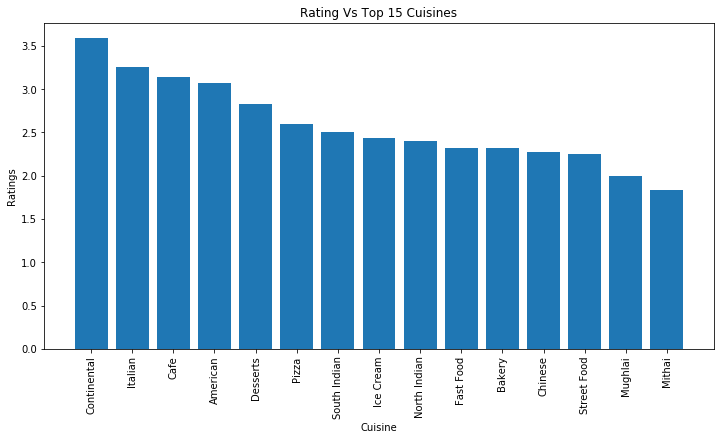

In [2]:
# 2.1.4
# Write a short detail analysis of how the rating is affected by Restaurant serving some specific cuisines
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

zomato = pd.read_csv("Downloads/zomato.csv",encoding = "ISO-8859-1")
df = zomato.copy()
df = df[df["Country Code"] == 1]

df.Cuisines = df.Cuisines.apply(lambda x : x + ", ")
ans = df.groupby("Country Code")["Cuisines"].sum().str.rstrip(', ')
l = ans.apply(lambda x: x.split(','))
l = l.apply(lambda x: [i.strip(" ") for i in x])
values = l.values[0]
cusi = Counter(values)
top15cusi = cusi.most_common(15)
top_15 = []
for i in top15cusi:
    top_15.append(i[0])

rating = df["Aggregate rating"]
np_rating = np.array(rating)

df.Cuisines = df.Cuisines.apply(lambda x : str(x).split(","))
cuisnies = df["Cuisines"]
np_cuisnies = np.array(cuisnies)

ll = []
for i in range(len(rating)):
    dd = pd.Series(np_rating[i],np_cuisnies[i])
    ll.append(dd)
data_data = pd.concat(ll)
d = {"Cuisine":data_data.index,"Rating":data_data.values}
data_data = pd.DataFrame(d)
data_data = data_data[data_data.Cuisine.isin(top_15)]
c_r = data_data.groupby("Cuisine")["Rating"].mean().sort_values(ascending=False)
ind = c_r.index
val = c_r.values

plt.subplots(figsize=(12,6))
plt.bar(ind,val)
plt.title("Rating Vs Top 15 Cuisines")
plt.ylabel("Ratings")
plt.xlabel("Cuisine")
plt.xticks(rotation=90)
plt.show()